In [10]:
import cv2
import os
import matplotlib.pyplot as plt

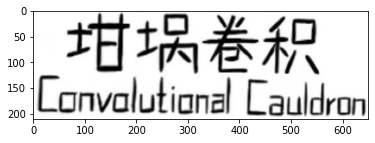

In [22]:
watermark = cv2.imread('./IMG_0669.JPG', cv2.IMREAD_UNCHANGED)[780:990, 220:870, :]
plt.imshow(watermark)

In [26]:
watermark = cv2.bitwise_not(watermark)


In [27]:
rgba = cv2.cvtColor(watermark, cv2.COLOR_RGB2RGBA)

In [28]:
rgba.shape

(210, 650, 4)

In [34]:
rgba[:, :, 3] = 100

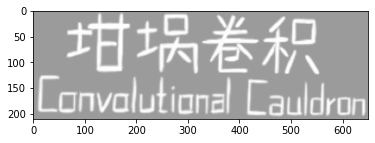

In [35]:
plt.imshow(rgba)

In [36]:
cv2.imwrite('./test.png', rgba)

True

In [ ]:
for imagePath in paths.list_images(args["input"]):
	# load the input image, then add an extra dimension to the
	# image (i.e., the alpha transparency)
	image = cv2.imread(imagePath)
	(h, w) = image.shape[:2]
	image = np.dstack([image, np.ones((h, w), dtype="uint8") * 255])
	# construct an overlay that is the same size as the input
	# image, (using an extra dimension for the alpha transparency),
	# then add the watermark to the overlay in the bottom-right
	# corner
	overlay = np.zeros((h, w, 4), dtype="uint8")
	overlay[h - wH - 10:h - 10, w - wW - 10:w - 10] = watermark
	# blend the two images together using transparent overlays
	output = image.copy()
	cv2.addWeighted(overlay, args["alpha"], output, 1.0, 0, output)
	# write the output image to disk
	filename = imagePath[imagePath.rfind(os.path.sep) + 1:]
	p = os.path.sep.join((args["output"], filename))
	cv2.imwrite(p, output)